In [7]:
%pip install mysql-connector-python pandas ipywidgets matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [3]:
def create_connection():
    connection = mysql.connector.connect(
        host="localhost",
        user="qian",
        password="zipcode0",
        database="starmeter"
    )
    return connection

# Function to retrieve the fan count for each celebrity
def get_fan_counts(connection):
    query = """
    SELECT current_favorite, COUNT(*) as fan_count 
    FROM user_dynamic_preferences 
    GROUP BY current_favorite;
    """
    df = pd.read_sql(query, connection)
    return df



In [ ]:
df = get_fan_counts()
clear_output(wait=True)
display(df)
time.sleep(5)

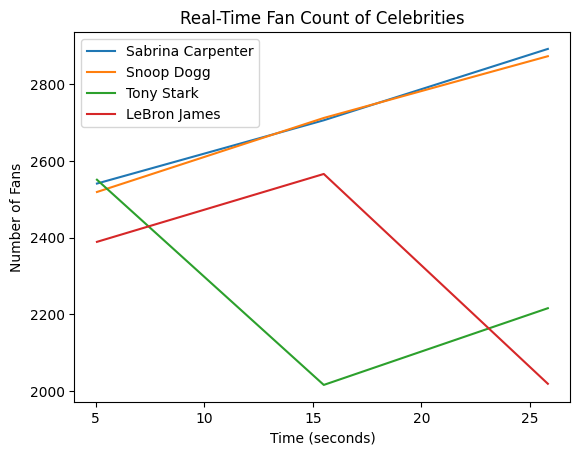

Real-time plot update interrupted.


In [11]:
# Function to display real-time updating line plot
def display_real_time_plot(refresh_interval=5):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    # Initialize the plot
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Fans')
    ax.set_title('Real-Time Fan Count of Celebrities')
    ax.set_ylim(0, 6000)
    ax.set_xlim(0, 100)

    # To track data over time
    time_data = []
    fan_counts_data = {celebrity: [] for celebrity in ['Sabrina Carpenter', 'Snoop Dogg', 'Tony Stark', 'LeBron James']}

    try:
        start_time = time.time()
        while True:
            current_time = time.time() - start_time
            time_data.append(current_time)

            df = get_fan_counts()
            for celebrity in fan_counts_data.keys():
                fan_count = df[df['current_favorite'] == celebrity]['fan_count'].sum() if not df[df['current_favorite'] == celebrity].empty else 0
                fan_counts_data[celebrity].append(fan_count)

            clear_output(wait=True)


            ax.clear()
            ax.set_xlabel('Time (seconds)')
            ax.set_ylabel('Number of Fans')
            ax.set_title('Real-Time Fan Count of Celebrities')

            for celebrity, fan_counts in fan_counts_data.items():
                ax.plot(time_data, fan_counts, label=celebrity)

            ax.legend(loc='upper left')
            display(fig)
            plt.pause(0.1)

            time.sleep(refresh_interval)
    except KeyboardInterrupt:
        print("Real-time plot update interrupted.")
    finally:
        plt.ioff() 
        plt.show()

# Main script
display_real_time_plot(refresh_interval=5)  # Update every 5 seconds